In [35]:
import pandas as pd

In [36]:
combined_model_rmse_path = r"C:\Users\Shane\Desktop\2024.06.27_-_Data_Science\2024.10.13 - Portfolio Projects\2024.12.04 - Swing Ticker\Model Performance\combined_model_rmse.csv"

In [37]:
df = pd.read_csv(combined_model_rmse_path)

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   ticker          150 non-null    object 
 1   volatility      150 non-null    object 
 2   avg_price       150 non-null    float64
 3   len             150 non-null    int64  
 4   rmse_standard   150 non-null    float64
 5   rmse_tuned      150 non-null    float64
 6   winsorized_pct  150 non-null    float64
dtypes: float64(4), int64(1), object(2)
memory usage: 8.3+ KB


In [39]:
df.head()

,ticker,volatility,avg_price,len,rmse_standard,rmse_tuned,winsorized_pct
0,ADYEY,Medium,16.389898,1347,5.087750,7.321585,0.397179
1,NMM,Medium,63.829555,4339,23.137863,18.612367,0.373358
2,MARK,High,214.811263,5455,10.280774,4.454470,0.273877
3,VIGI,Low,63.282331,2251,12.586773,3.847514,0.545980
4,GDRX,Medium-High,17.561466,1102,2.904431,1.844597,0.259528


In [40]:
len(df)

150

In [41]:
df.head()

,ticker,volatility,avg_price,len,rmse_standard,rmse_tuned,winsorized_pct
0,ADYEY,Medium,16.389898,1347,5.087750,7.321585,0.397179
1,NMM,Medium,63.829555,4339,23.137863,18.612367,0.373358
2,MARK,High,214.811263,5455,10.280774,4.454470,0.273877
3,VIGI,Low,63.282331,2251,12.586773,3.847514,0.545980
4,GDRX,Medium-High,17.561466,1102,2.904431,1.844597,0.259528


In [ ]:
df['cust_delta'] = (df['rmse_tuned'] - df['rmse_standard']) / df['rmse_standard']

In [43]:
df.head()

,ticker,volatility,avg_price,len,rmse_standard,rmse_tuned,winsorized_pct,cust_delta
0,ADYEY,Medium,16.389898,1347,5.087750,7.321585,0.397179,0.439061
1,NMM,Medium,63.829555,4339,23.137863,18.612367,0.373358,-0.195588
2,MARK,High,214.811263,5455,10.280774,4.454470,0.273877,-0.566718
3,VIGI,Low,63.282331,2251,12.586773,3.847514,0.545980,-0.694321
4,GDRX,Medium-High,17.561466,1102,2.904431,1.844597,0.259528,-0.364902


In [44]:
len(df)

150

In [53]:
vol_order = ['Low', 'Medium-Low', 'Medium', 'Medium-High', 'High']

In [ ]:
# Set volatility to ordered categorical

df['volatility'] = pd.Categorical(df['volatility'], categories=vol_order, ordered=True) 

In [70]:
# Get average price, length, and winsorized percentage for each volatility level

df_mean = df.groupby('volatility').agg({
    'avg_price': 'mean', 
    'len': 'mean', 
    'winsorized_pct': 'mean',
    'cust_delta': 'mean', 
    'rmse_standard': 'mean',
    'rmse_tuned': 'mean'
}).sort_index().reset_index()
df_mean

C:\Users\Shane\AppData\Local\Temp\ipykernel_29984\910504958.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_mean = df.groupby('volatility').agg({


,volatility,avg_price,len,winsorized_pct,cust_delta,rmse_standard,rmse_tuned
0,Low,3.886263e+01,2768.166667,0.555451,-0.153043,3.786161,2.554092
1,Medium-Low,3.753373e+01,6071.533333,0.381201,-0.281065,18.436105,13.038622
2,Medium,2.917535e+01,5074.100000,0.372707,-0.178366,18.935506,15.143909
3,Medium-High,3.777125e+01,3486.166667,0.294965,-0.192912,21.338418,16.981323
4,High,5.928693e+09,2905.833333,0.252654,-0.283384,123.351131,61.539941


In [64]:
# Which category had a wider range of pct_change values?

df.groupby('volatility').agg({'cust_delta': 'std'}).sort_values('cust_delta', ascending=False).sort_index().reset_index()

C:\Users\Shane\AppData\Local\Temp\ipykernel_29984\1532854326.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('volatility').agg({'cust_delta': 'std'}).sort_values('cust_delta', ascending=False).sort_index().reset_index()


,volatility,cust_delta
0,Low,0.239450
1,Medium-Low,0.271040
2,Medium,0.309107
3,Medium-High,0.240959
4,High,0.314926


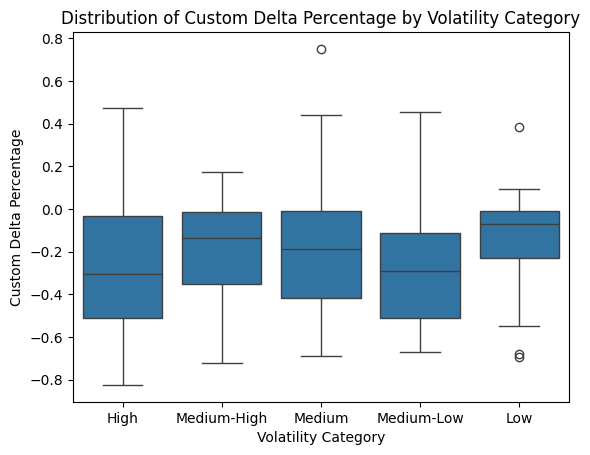

In [48]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define the desired order of volatility categories
volatility_order = ['High', 'Medium-High', 'Medium', 'Medium-Low', 'Low']

# Create the boxplot, specifying the order
sns.boxplot(x='volatility', y='cust_delta', data=df, order=volatility_order)
plt.title('Distribution of Custom Delta Percentage by Volatility Category')
plt.xlabel('Volatility Category')
plt.ylabel('Custom Delta Percentage')
plt.show()

In [49]:
# pct change between models across all samples was...

df['cust_delta'].mean()

np.float64(-0.21775384870337083)

In [51]:
df.sort_values(by='cust_delta').head()

,ticker,volatility,avg_price,len,rmse_standard,rmse_tuned,winsorized_pct,cust_delta
115,ACON,High,2609.747585,704,1731.085986,302.723998,0.288352,-0.825125
39,VERV,High,21.222462,918,15.274003,3.557291,0.303922,-0.767102
42,RELI,High,376.876723,1007,303.066552,70.975514,0.334657,-0.765809
9,SDA,High,10.007640,961,6.547074,1.760112,0.211238,-0.731160
133,MPNGY,Medium-High,45.233815,1325,31.668995,8.831124,0.298113,-0.721143


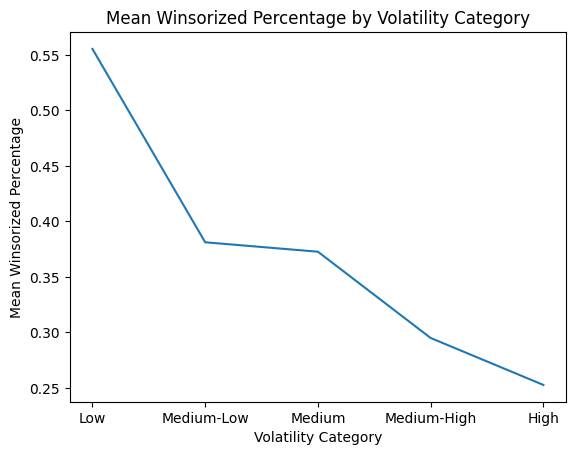

In [77]:
# line graph for volatility w winosrized_pct for df_mean

plt.plot(df_mean['volatility'], df_mean['winsorized_pct'])
plt.title('Mean Winsorized Percentage by Volatility Category')
plt.xlabel('Volatility Category')
plt.ylabel('Mean Winsorized Percentage')
plt.show()

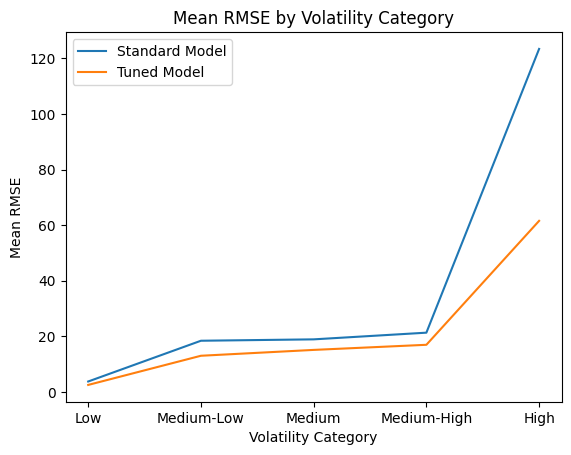

In [78]:
# line graph for volatility w rmse_standard & rmse_tuned

plt.plot(df_mean['volatility'], df_mean['rmse_standard'], label='Standard Model')
plt.plot(df_mean['volatility'], df_mean['rmse_tuned'], label='Tuned Model')
plt.title('Mean RMSE by Volatility Category')
plt.xlabel('Volatility Category')
plt.ylabel('Mean RMSE')
plt.legend()
plt.show()